In [7]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Video%20Game%20Sales%20and%20Ratings/Video_Game_Sales_as_of_Jan_2017.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data[data.Year_of_Release.notnull()]

data = data.loc[data.Year_of_Release < 2017]

data.Year_of_Release = data['Year_of_Release'].astype(int)

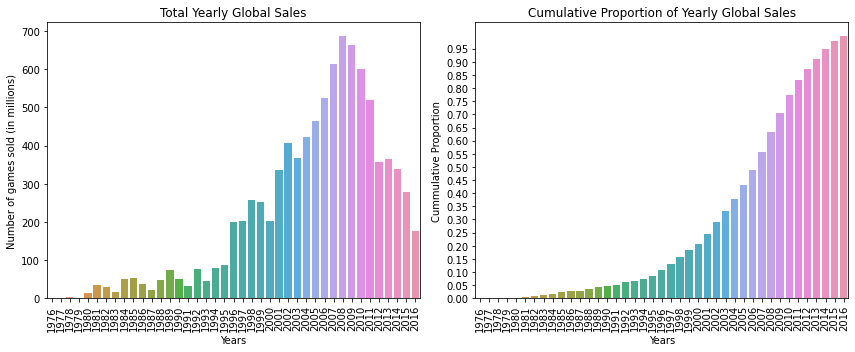

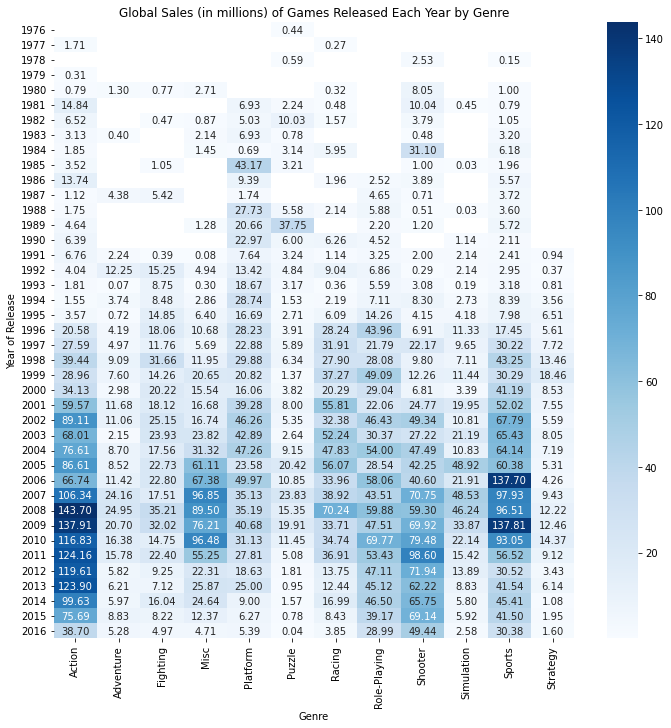

In [9]:
Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum)
Sales_by_Gen_and_Yr.columns = Sales_by_Gen_and_Yr.columns.get_level_values(1)

Yearly_Tots = Sales_by_Gen_and_Yr.sum(axis=1)
Yearly_Tots = Yearly_Tots.sort_index()
YT1_cumsum = Yearly_Tots.cumsum()/Yearly_Tots.sum()

fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(y = Yearly_Tots.values, x = Yearly_Tots.index,ax=ax1)
ax1.set_title('Total Yearly Global Sales')
plt.setp(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of games sold (in millions)')

sns.barplot(y = YT1_cumsum.values, x = YT1_cumsum.index, ax=ax2)
ax2.set_title('Cumulative Proportion of Yearly Global Sales')
plt.setp(ax2.get_xticklabels(),rotation=90)
ax2.set_xlabel('Years')
ax2.set_ylabel('Cummulative Proportion')
ax2.yaxis.set_ticks(np.arange(0,1,0.05))
fig.tight_layout()

plt.figure(figsize=(10,10))
sns.heatmap(Sales_by_Gen_and_Yr,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('Global Sales (in millions) of Games Released Each Year by Genre')
plt.show()

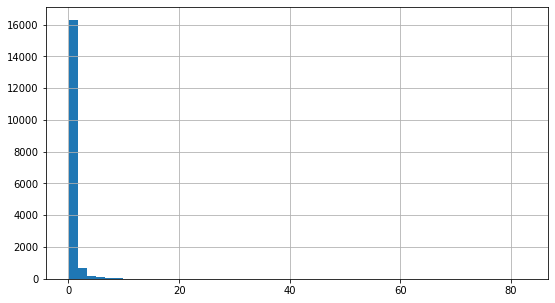

In [10]:
plt.figure(figsize=(9,5))
data.Global_Sales.hist(bins=50)
plt.show()

In [11]:
data = data.loc[data.Year_of_Release >= 1991]

Med_Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.median)
Med_Sales_by_Gen_and_Yr.columns = Med_Sales_by_Gen_and_Yr.columns.get_level_values(1)

Med_Sales_by_Gen_and_Yr.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1991,0.420,1.120,0.39,0.080,0.78,0.585,1.140,0.38,0.23,1.070,0.280,0.215
1992,2.020,0.475,1.66,2.470,1.00,1.120,4.520,0.97,0.13,2.140,0.370,0.060
1993,0.145,0.070,0.45,0.060,0.56,0.980,0.180,0.32,1.54,0.190,0.180,0.405
1994,0.050,0.435,0.18,0.050,1.79,0.700,0.190,0.12,0.33,0.280,0.345,0.310
1995,0.380,0.050,0.23,0.085,0.30,0.175,0.155,0.34,0.10,0.085,0.190,0.125
